In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Generating data

In [171]:
sample_size = int(1e3);
x = np.linspace(0,1, num=sample_size);
y = np.sin(2*np.pi*x)
data = np.sin(2*np.pi*x) + np.random.normal(size=sample_size,scale=0.35);
#data = np.sin(2*np.pi*x) + (np.e**x)*1.7 + np.random.normal(size=sample_size,scale=0.35);

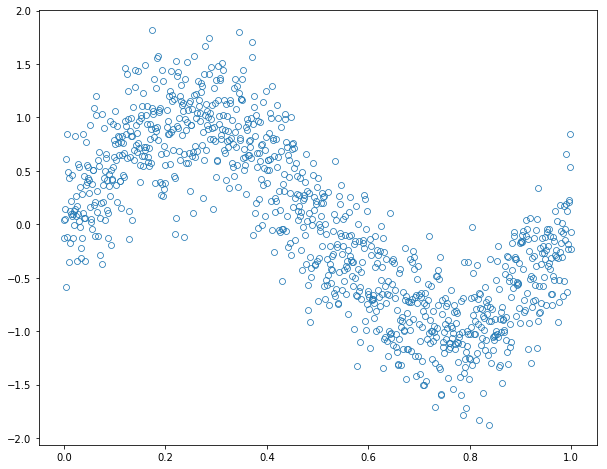

In [172]:
plt.figure(figsize=(10,8))
plt.plot(x,data,'o',markerfacecolor='none',markeredgewidth=0.75);
#plt.show();

#### Splitting data

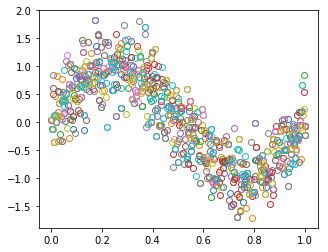

In [173]:
obs = np.zeros((10,1000));
obs[:] = np.nan

plt.figure(figsize=(5,4))

for i in range(10):
    np.random.seed(i)
    rdn_index = np.random.randint(0,1000,100)

    for j in rdn_index:
        obs[i][j] = data[j]
    
    plt.plot(x,obs[i],'o',markerfacecolor='none',markeredgewidth=1);


In [226]:
df = pd.DataFrame(obs)
df.isnull().sum()

0       8
1       8
2       9
3      10
4      10
5       9
6       9
7       8
8       9
9       7
10     10
11     10
12      9
13     10
14      9
15      9
16     10
17     10
18     10
19      8
20      8
21     10
22      9
23     10
24     10
25      9
26      8
27      9
28      8
29     10
       ..
970     8
971    10
972     7
973    10
974     9
975    10
976     8
977     8
978    10
979     9
980     8
981    10
982     9
983     9
984     9
985    10
986     8
987     8
988     8
989     9
990    10
991     9
992    10
993    10
994     9
995    10
996     9
997     9
998     8
999     7
Length: 1000, dtype: int64

#### Defining the function

Now, we'll see the problem of $ y(\boldsymbol{x},\boldsymbol{w}) = w_0 + w_1 x^1 + ... + w_D x^D $ and make some changes. Let's choose some arbitrary function class $ \phi(x) $ and then, our previous relation becomes $ y(\boldsymbol{x},\boldsymbol{\phi}) = w_0 + w_1 \phi_1 + ... + w_D \phi_D $, such that $ \phi_i $ are apparently linearly independent. So, in this example we'll choose the function $$ \phi_i = \exp \left( -\frac{(x-\mu_i)^2}{s^2} \right) $$

Defining the model matrix

<font color="red">Missing to define the covariance matrix $\sum ^{-1}$ and replace it in $ s $</font>

In [151]:
M = 10

def f_phi(x,mu,s=1):
    aux = x-mu
    return np.e**(-(np.dot(aux,aux.T)) / s**2)

In [152]:
N = 3

phi = np.zeros((M,N))

In [220]:
for i in range(M):
    for j in range(N):
        phi[i][j] = f_phi(df[i:i+1][~np.isnan(df)],j)

print(phi)

[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]


In [218]:
for i in range(10):
    obs[i]
    x = obs[i][~np.isnan(obs[i])]
    print(x.shape)

(96,)
(98,)
(95,)
(94,)
(95,)
(97,)
(92,)
(94,)
(96,)
(95,)
